# **Introducción**

El dataset **Ames Housing** contiene información detallada sobre 2,930 propiedades residenciales vendidas en Ames, Iowa (EE. UU.), entre 2006 y 2010. Este incluye variables explicativas que describen aspectos diversos de las viviendas, desde características físicas (tamaño, número de habitaciones, calidad de construcción) hasta ubicación, antigüedad y detalles menos convencionales (como la presencia de vías ferroviarias cercanas o el tipo de pavimento de la calle).
[Fuente](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## **Motivación**

Comprar o vender una casa es una decisión importante y el precio no solo depende de factores obvios sino también de detalles menos evidentes. Este proyecto busca explorar el conjunto de datos para descubrir qué características influyen más en el valor de una propiedad y cómo estas se relacionan entre sí.

## **Utilidad**



*   Futuros compradores o vendedores de viviendas, que quieran entender qué aspectos valorar al negociar un precio.


*   Agentes inmobiliarios y asesores, interesados en identificar las variables clave que afectan el valor de las propiedades.



## **Preguntas**

1. ¿Qué características físicas tienen mayor correlación con el precio?
2. ¿Cómo afecta la ubicación, barrio, al valor de la propiedad?
3. ¿Las casas más antiguas tienden a venderse a menor precio, o influye más su estado de conservación?

# **Carga de Datos**

In [1]:
# Librerias
from google.colab import drive
import os
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Data Science ll/Data'
# Cargar el archivo CSV
df = pd.read_csv('train.csv', sep=',')
#df = pd.read_csv('Data/train.csv', sep=',')


/content/gdrive/MyDrive/Data Science ll/Data


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

El dataset conta de 81 columnas y 1460 filas, donde cada una de las filas representa una casa vendida.

In [5]:
#elimino columna inecesaria
df = df.drop('Id', axis=1)

## Nulos

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
# porcentaje de valores nulos por columna en orden descendente
null_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
null_percent[null_percent > 0]

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageType,5.547945
GarageFinish,5.547945


Como variable tópica esta **PoolQC** con un **99.5% nulos**, lo que significaría que la mayoría de las propiedades no tienen piscina.

In [8]:
# reemplazo los NA por None, variables categoricas
categorical_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2']

df[categorical_none] = df[categorical_none].fillna('None')

#variables numericas

df['LotFrontage'] = df['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt']) #si no hay garaje, usar año de construccion de la casa
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [9]:
# verifico que no queden nulos
assert df.isnull().sum().sum() == 0, "¡Aún hay valores nulos!"

# DEA

## ¿Qué características físicas tienen mayor correlación con el precio?

 Para contestar esta pregunta voy a usar las siguientes columnas:
* **GrLivArea:** Área habitable sobre nivel del suelo.

* **TotalBsmtsF:** Área total del sótano.

* **BedroomAbvGr:** Número de habitaciones.

* **FullBath:** Número de baños completos.

* **SalePrice:** Precio de venta.


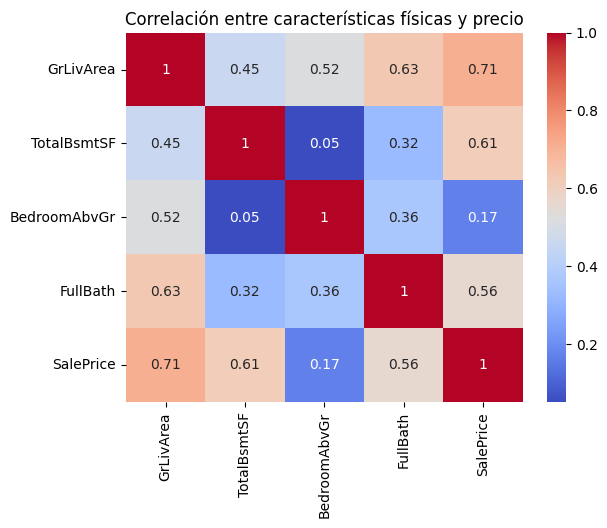

In [10]:
corr_matrix = df[['GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación entre características físicas y precio")
plt.show()

El resultado del grafico muestra una fuerte correlación entre área habitable y área de sótano mayor el precio de venta, mientras que el número de habitaciones no influye mucho en el precio.

Para ver más clara la relación entre área habitable y precio.

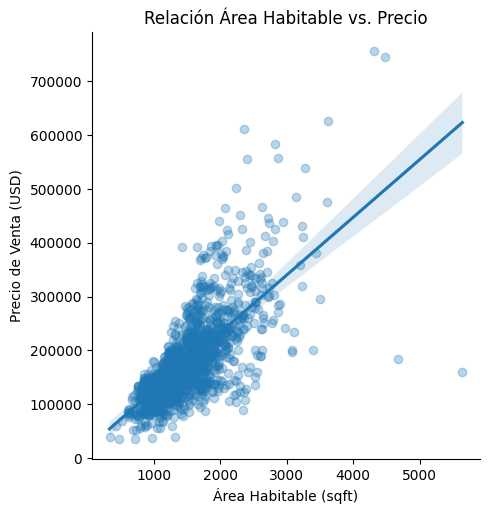

In [22]:
# graficos de dispersion con linea
sns.lmplot(data=df, x='GrLivArea', y='SalePrice', scatter_kws={'alpha':0.3})
plt.title("Relación Área Habitable vs. Precio")
plt.xlabel("Área Habitable (sqft)", fontsize=10)#square feet (pies cuadrados)
plt.ylabel("Precio de Venta (USD)", fontsize=10)
plt.show()

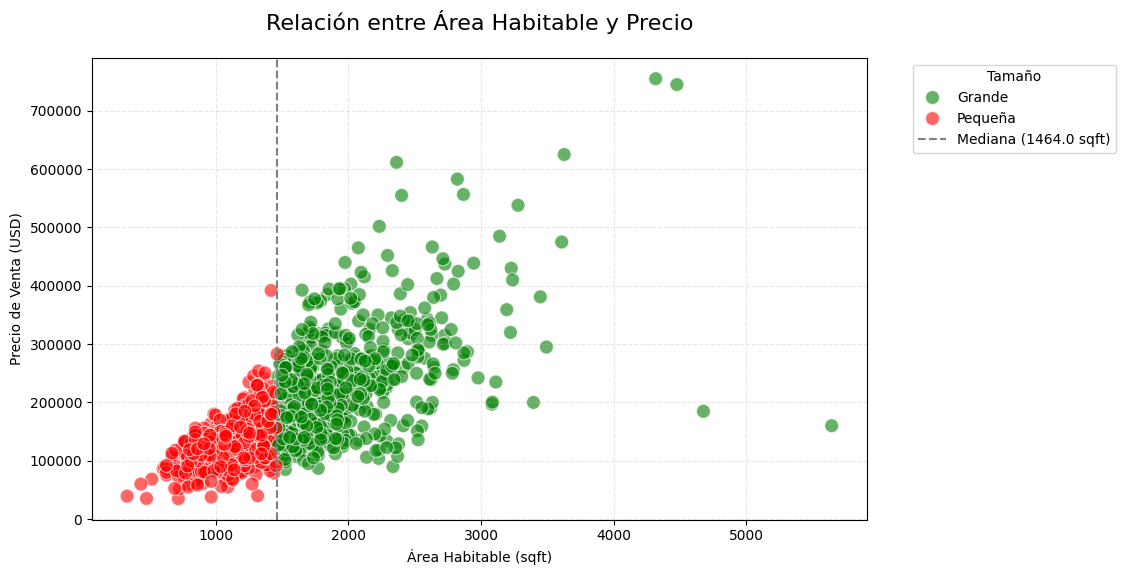

In [27]:
# separo casas grandes y pequeñas
median_area = df['GrLivArea'].median()
df['Size_Category'] = df['GrLivArea'].apply(lambda x: 'Grande' if x > median_area else 'Pequeña')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GrLivArea',
    y='SalePrice',
    hue='Size_Category',
    palette={'Grande': 'green', 'Pequeña': 'red'},
    alpha=0.6,
    s=100  # Tamaño de los puntos
)

plt.title("Relación entre Área Habitable y Precio", fontsize=16, pad=20)
plt.xlabel("Área Habitable (sqft)", fontsize=10)
plt.ylabel("Precio de Venta (USD)", fontsize=10)
plt.axvline(median_area, color='gray', linestyle='--', label=f'Mediana ({median_area} sqft)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Tamaño", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## ¿Cómo afecta la ubicación, barrio, al valor de la propiedad?

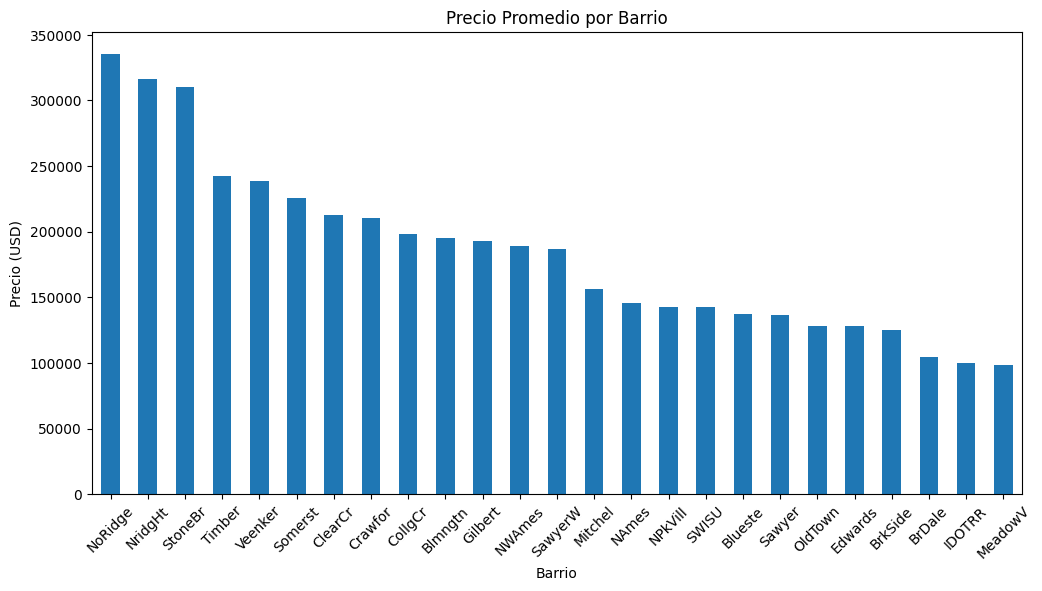

In [24]:
# precio promedio por barrio, ordenado
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Precio Promedio por Barrio")
plt.ylabel("Precio (USD)")
plt.xlabel("Barrio")
plt.xticks(rotation=45)
plt.show()

Los barrios NoRidge, NridgHt, StoneBr son los más caros 300K, mientras que BrDale, IDOTRR, MeadowV son los más baratos 100K. Mostrando así una diferencia del 200% los precios de las casas entre barrios.

Uso un gráfico de boxplot. para ver mejor la variabilidad, distribución, rangos, media, simetría y outliers.

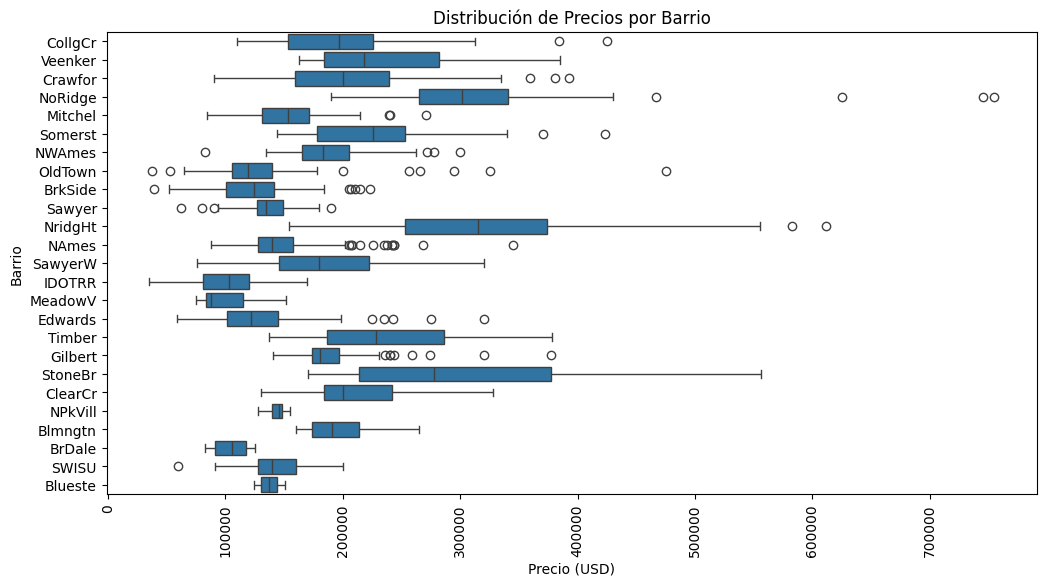

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Neighborhood', x='SalePrice')
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Barrio")
plt.xlabel("Precio (USD)")
plt.ylabel("Barrio")
plt.show()

Con esto podemos ver que NridgHt tiene un precio promedio mayor a NoRidge, quien era el que mayor precio tenía en el grafico de barras, pero gracias a este se puede ver que cuenta con varios outliners.

## ¿Las casas más antiguas tienden a venderse a menor precio, o influye más su estado de conservación?


Para este grafico voy a usar:
* YearBuilt: Año de construcción de la propiedad.

* SalePrice: Precio de venta.

* OverallCond: Condición general de la propiedad (escala de 1 a 9, donde 1 = "Muy pobre" y 9 = "Excelente").

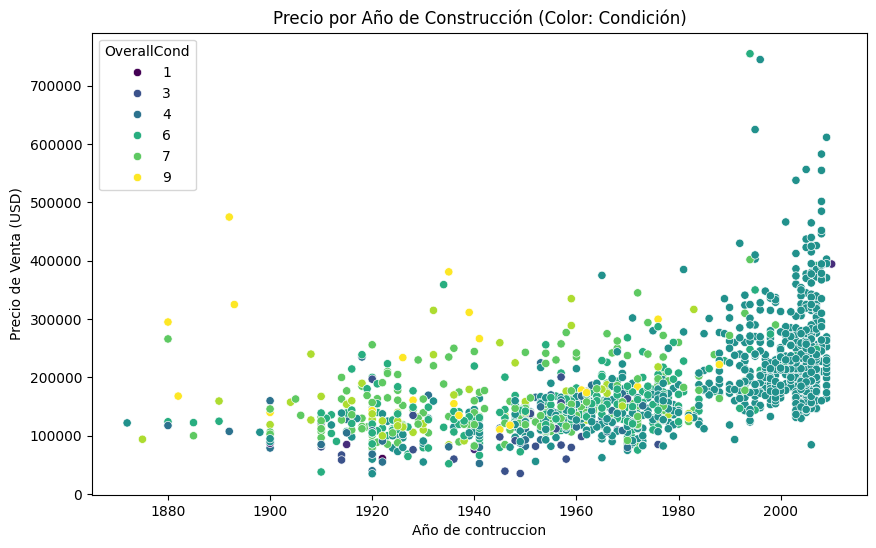

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', hue='OverallCond', palette='viridis')
plt.title("Precio por Año de Construcción (Color: Condición)")
plt.xlabel("Año de contruccion", fontsize=10)
plt.ylabel("Precio de Venta (USD)", fontsize=10)
plt.show()

Casas de 1800 a 1980 se puede ver como las casas se mantienen en un rango estable de precios bajos, salvo algunos outliners con una condición regula/mala. Las casas de 1980 a 2010 ya incrementa su precio y la mayoría son de buena calidad. Se puede ver casa en buen estado baratas de fecha de construcción 1920 a 1970.

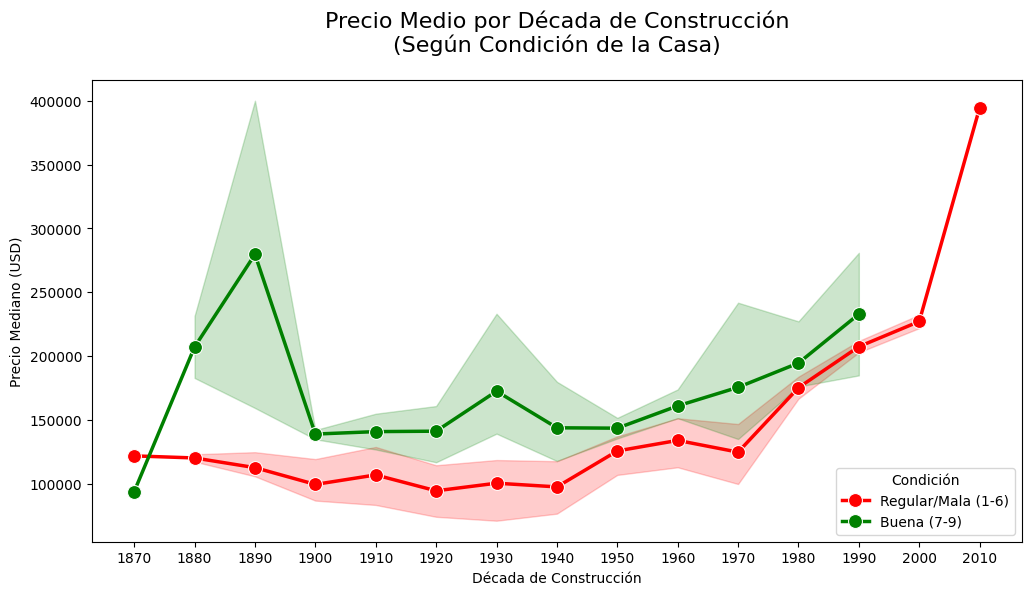

In [49]:
#decada
df['Decade'] = (df['YearBuilt'] // 10) * 10  # 1983 a 1980
df_decade = df.groupby(['Decade', 'OverallCond']).agg({'SalePrice': 'median'}).reset_index() #calculo mediana para evitar outliers

# filtro condiciones
df_decade['Condition'] = df_decade['OverallCond'].apply(lambda x: 'Buena (7-9)' if x >= 7 else 'Regular/Mala (1-6)')

# grafico de lineas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_decade,
    x='Decade',
    y='SalePrice',
    hue='Condition',
    palette={'Buena (7-9)': 'green', 'Regular/Mala (1-6)': 'red'},
    marker='o',
    linewidth=2.5,
    markersize=10
)
plt.title("Precio Medio por Década de Construcción\n(Según Condición de la Casa)", fontsize=16, pad=20)
plt.xlabel("Década de Construcción", fontsize=10)
plt.ylabel("Precio Mediano (USD)", fontsize=10)
plt.xticks(df_decade['Decade'].unique())
plt.legend(title="Condición")

plt.show()

Las casas más modernas 1990-2010 tienden a ser más caras, mas alla de su condición. Y las casas antiguas tienen precios más bajos, a menos que estén bien mantenidas.

# Conclusiones

\Para compradores, el área habitable, el barrio, el año de fabricación y el estado de esta son factores que van a influir mucho en el precio de la casa. Para un vendedor hacer foco en casa antiguas de regular/buena en zonas habitables grandes y de barrios acordes. Ayudaran a facilitar la venta o la compra de una propiedad.